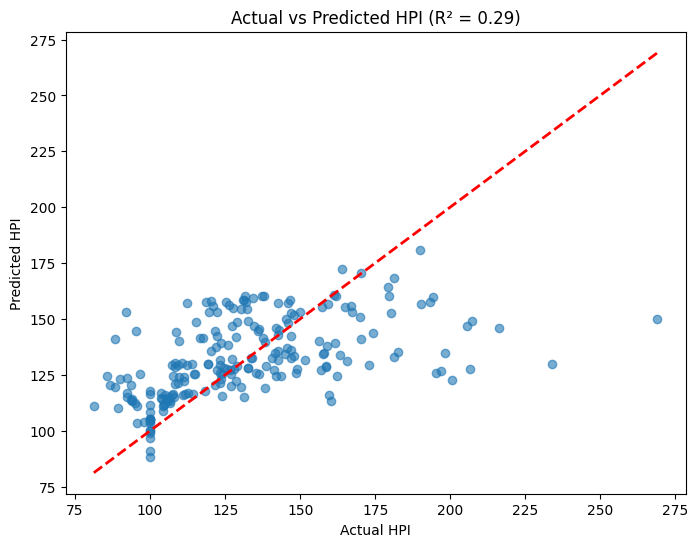

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score

# Load the dataset
file_path = "Final Data.xlsx"  # Update this path if needed
df = pd.read_excel(file_path, sheet_name='Sheet1')

# Define features and target variable
features = ["New Housing / Population", "Unemployment Rate", "Mortgage Rate", "Top 1% share of Income"]
target = "HPI with 2000 base"

# Drop rows with missing values
df_cleaned = df.dropna(subset=["Top 1% share of Income", "HPI with 2000 base"])

# Extract features and target
X = df_cleaned[features]
y = df_cleaned[target]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the Ridge regression model
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = ridge.predict(X_test_scaled)

# Compute R² score
r2 = r2_score(y_test, y_pred)

# Plot actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='dashed', linewidth=2)
plt.xlabel("Actual HPI")
plt.ylabel("Predicted HPI")
plt.title(f"Actual vs Predicted HPI (R² = {r2:.2f})")
plt.show()
